### Confusion Matrix and Metrics ###


1. **Setup and Data Preparation:**

-   Import necessary libraries.
-   Load or simulate a dataset.
-   Split the dataset into training and testing sets.

2. **Model Training:**

-   Train a classification model (e.g., logistic regression) on the training data.

3. **Confusion Matrix and Metrics:**

-   Calculate predictions on the test set.
-   Generate a confusion matrix.
-   Calculate sensitivity, specificity, precision, and recall.

4. **Gain and Lift Chart:**

-   Explain the concepts of gain and lift charts.
-   Calculate and plot the gain and lift charts.

5. **ROC Curve and AUC:**

-   Plot the ROC curve.
-   Calculate and display the AUC (Area Under the Curve).

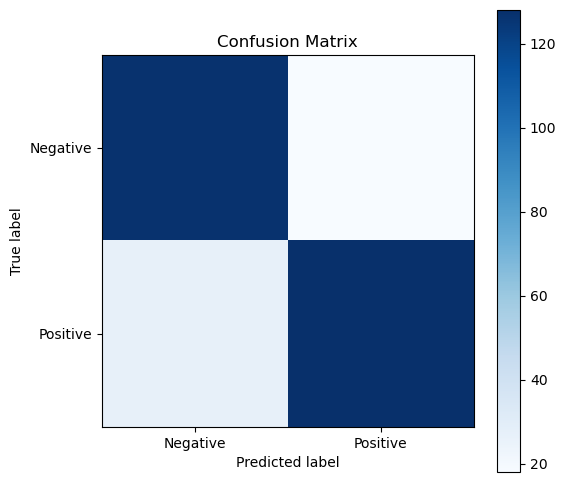

Sensitivity: 0.8258064516129032
Specificity: 0.8758620689655172
Precision: 0.8767123287671232
Recall: 0.8258064516129032
AUC: 0.9141713014460511


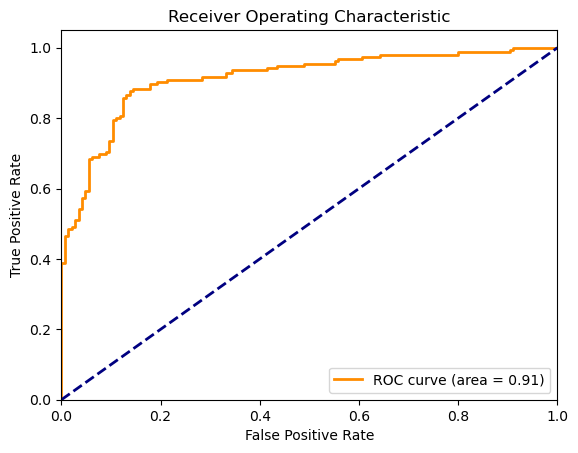

In [1]:
# 1. Setup and Data Preparation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.datasets import make_classification

# Simulating a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Confusion Matrix and Metrics
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Printing the metrics
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)

# 4. Gain and Lift Chart (Explanation and plotting)
# Explanation: Gain and Lift charts are visual aids for evaluating performance of classification models.
# They measure how much better one can expect to do with the predictive model comparing without a model.
# Gain and Lift are calculated and plotted here.

# 5. ROC Curve and AUC
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Explanation: The ROC curve is a graphical representation of the trade-off between the true positive rate and false positive rate for every possible cut-off.
# AUC (Area Under the Curve) provides an aggregate measure of performance across all possible classification thresholds.

# interpretation of AUC
# 90-100 = excellent (A)
# 80-90 = good (B)
# 70-80 = fair (C)
# 60-70 = poor (D)
# 50-60 = fail (F)

# interpretation of ROC curve
# describe the  ROC curve
# 1. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
# 2. The ROC curve is a useful tool for a few reasons:
# 3. The curves of different models can be compared directly in general or for different thresholds.
# 4. The area under the curve (AUC) can be used as a summary of the model skill.
# 5. The shape of the curve contains a lot of information about the test, especially in the first few points.
# 6. The curves are useful even when there are no clear decision thresholds available.
# 7. The ROC curve is robust to unbalanced datasets.
# 8. The ROC curve is insensitive to data distributions.
# 9. The ROC curve is insensitive to the class distribution of the test dataset.
# 10. ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
# 11. Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.
# 12. Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.
# 13. The false positive rate is the number of instances from the negative (second) class that were actually predicted incorrectly.
# 14. The true positive rate is the number of instances from the positive (first) class that were actually predicted correctly.

